In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import Compose, ToTensor
from torchvision.datasets import MNIST
import torch.nn as nn

In [2]:
preprocess = Compose([
    ToTensor()
])

train_dataset = MNIST(root='./data', train=True, download=True, transform=preprocess)
test_dataset = MNIST(root='./data', train=False, download=True, transform=preprocess)

train_data = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_data = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [3]:
train_data

In [4]:
data_iter = iter(train_data)
images, labels = next(data_iter)
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [5]:
labels

tensor([7, 6, 8, 9, 8, 5, 3, 8, 0, 6, 1, 3, 9, 3, 5, 6, 9, 7, 6, 4, 5, 4, 7, 5,
        0, 5, 2, 0, 3, 0, 8, 9, 3, 6, 4, 6, 4, 7, 7, 9, 1, 9, 3, 4, 0, 0, 4, 1,
        4, 3, 6, 5, 6, 5, 3, 0, 1, 0, 3, 6, 3, 4, 6, 3])

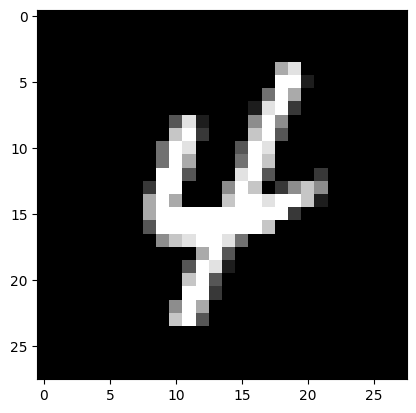

In [6]:
plt.imshow(images[-3].squeeze(), cmap='gray')
plt.show()

In [7]:
BATCH_SIZE = 64
EPOCH = 10

In [8]:
class simpleUNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.conv2d(128, 64, 3, padding=1)
        self.conv4 = nn.conv2d(64, 1, 3, padding=1)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.conv4(x)

        return x
    

In [9]:
normal_data = np.array(torch.randn(1000))

(array([1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 2., 1., 1., 0.,
        1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        2., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
        0., 

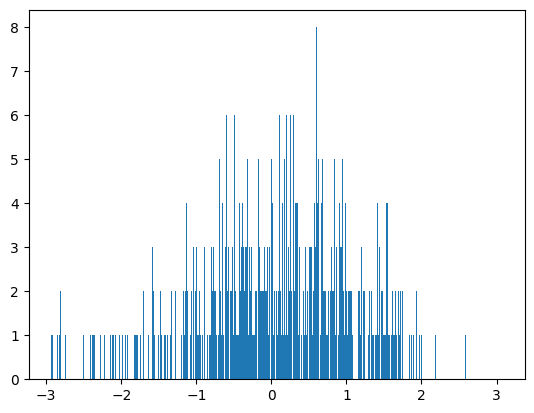

In [56]:
plt.hist(normal_data, bins=len(normal_data))

In [58]:
images[0].shape

torch.Size([1, 28, 28])

torch.Size([1, 28, 28])


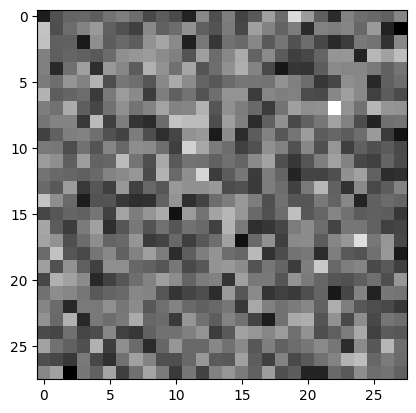

In [ ]:
def forward_add_noise(image, timestep):
    noise = torch.randn(image.shape)
    # noise = torch.randn_like(image)
    return noise


noise = forward_add_noise(images[0], 1)
print(noise.shape)
plt.imshow(noise.squeeze(), cmap='gray')
plt.show()


In [55]:
T = 200
IMG_SHAPE = (28, 28, 1)
betas = np.linspace(1e-4, 0.02, T, dtype=np.float32)
alphas = 1 - betas
alphas_cumprod = np.cumprod(alphas)

In [56]:
alphas_cumprod

array([0.9999    , 0.9997    , 0.99940014, 0.9990004 , 0.9985008 ,
       0.99790174, 0.99720323, 0.9964055 , 0.99550873, 0.9945132 ,
       0.99341923, 0.9922271 , 0.99093723, 0.98954993, 0.9880656 ,
       0.98648465, 0.9848076 , 0.98303497, 0.9811672 , 0.9792049 ,
       0.9771486 , 0.97499883, 0.9727563 , 0.97042173, 0.9679957 ,
       0.9654789 , 0.96287215, 0.9601761 , 0.9573916 , 0.95451945,
       0.95156044, 0.9485155 , 0.94538534, 0.942171  , 0.9388734 ,
       0.93549347, 0.9320321 , 0.9284904 , 0.9248693 , 0.9211698 ,
       0.91739297, 0.91353995, 0.9096117 , 0.90560937, 0.90153414,
       0.8973871 , 0.89316934, 0.8888821 , 0.8845266 , 0.880104  ,
       0.8756155 , 0.8710623 , 0.86644566, 0.8617669 , 0.8570271 ,
       0.8522278 , 0.8473701 , 0.8424553 , 0.83748484, 0.8324599 ,
       0.8273819 , 0.82225215, 0.817072  , 0.81184274, 0.80656576,
       0.8012424 , 0.7958741 , 0.7904622 , 0.785008  , 0.77951294,
       0.7739784 , 0.7684058 , 0.7627964 , 0.7571517 , 0.75147

In [57]:
def forward(x0, t):
    noise = torch.randn((28,28))
    a_bar = np.array(alphas_cumprod[t])
    a_bar = torch.from_numpy(a_bar)
    a_bar = a_bar.reshape((1,1,1,1))
    out = torch.sqrt(a_bar) * x0 + torch.sqrt(1 - a_bar) * noise

    return out 

noisy_img = forward(images[-3].squeeze(), 50)
print(noisy_img.shape)

torch.Size([1, 1, 28, 28])


10


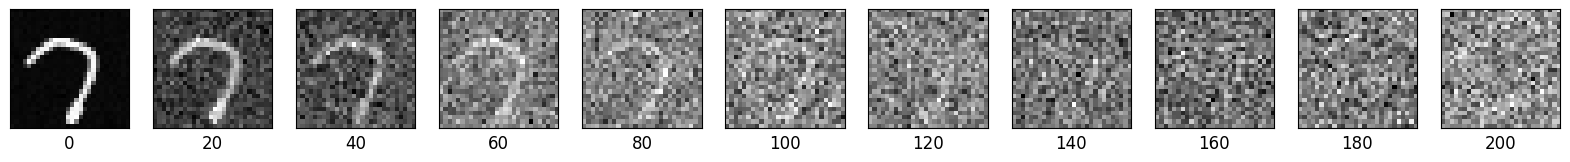

In [58]:
imgs = []
for i in range(10):
    imgs.append(torch.squeeze(forward(images[0], i*20)))
print(len(imgs))
imgs.append(torch.squeeze(forward(images[0], 199)))


plt.figure(figsize=(20, 20))
for i in range(len(imgs)):
    plt.subplot(1, 11, i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.xticks([])  #hide
    plt.yticks([])  
    plt.xlabel(str(i*20), fontsize=12)

    
plt.show()

In [59]:
print(imgs[-1].mean())
print(imgs[-1].std())

tensor(0.0534)
tensor(0.9242)


10


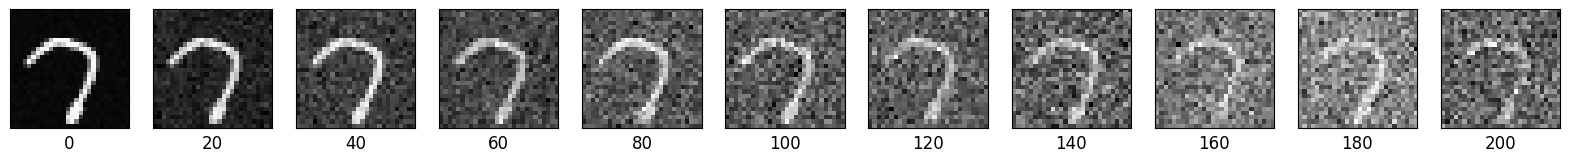

In [61]:
T = 200
IMG_SHAPE = (28, 28, 1)
betas = np.linspace(1e-4, 0.002, T, dtype=np.float32)
alphas = 1 - betas
alphas_cumprod = np.cumprod(alphas)

imgs = []
for i in range(10):
    imgs.append(torch.squeeze(forward(images[0], i*20)))
print(len(imgs))
imgs.append(torch.squeeze(forward(images[0], 199)))


plt.figure(figsize=(20, 20))
for i in range(len(imgs)):
    plt.subplot(1, 11, i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.xticks([])  #hide
    plt.yticks([])  
    plt.xlabel(str(i*20), fontsize=12)

    
plt.show()

In [62]:
print(imgs[-1].mean())
print(imgs[-1].std())

tensor(0.0751)
tensor(0.4915)
